# Problem set 3

#### Mini batch gradient descent
Dataset: simple pendulum. <br>
Here, we consider a simple pendulum oscillation dataset with two variables. <br>
The dataset consists of two columns and 90 rows. <br>
Each column represents a characteristic of a simple pendulum i.e l (length) and t (time period). <br>
The dataset describes the relationship between the l and t which is  $L∝T^2$. <br>

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data by using pandas read_csv()
data = pd.read_csv("SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
data.head()

,l,t
0,0.10,0.69004
1,0.11,0.69497
2,0.12,0.74252
3,0.13,0.75360
4,0.14,0.83568


In [2]:
# Get the length and time period values from the dataset
l = data['l'].values
t = data['t'].values
# Get the square of time period
tsq = t * t

In [3]:
"""
The function 'train_one_batch' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss is returned.
"""
def train_one_batch(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

"""
The function below takes a batch_size and loss is calculated w.r.t batches.
The batches are created using random index.
The m, c and error values are calculated for each batch of data.
So, it calls the function 'train_one_batch' by passing batch_x, batch_y for each batch.
"""
def train_batches(x, y, m, c, eta, batch_size):
    
    # Making the batches
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    
    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[batch*batch_size:(batch+1)*batch_size]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)
    
    return m, c, err

"""
The function below trains the data for 1000 iterations. 
The data is traversed in batches, the batch size here is considered to be 10.
In each iteration it calls the 'train_batches' function. 
The 'batch_size' is passed as a parameter to 'train_batches'.
"""
def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):  #iterations is same as epoch
        m, c, err = train_batches(x, y, m, c, eta, batch_size)
    return m, c, err

In [4]:
# Initializing m, c
m, c = 0, 0

In [5]:
# Learning rate
lr = 0.01

In [6]:
m, c, err = train_minibatch(l, tsq, m, c, lr, batch_size=10, iterations=1000) 

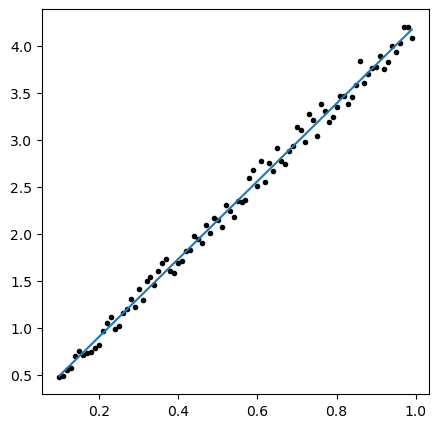

In [7]:
y = m * l + c
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(l, tsq, '.k')
ax.plot(l, y)

In [8]:
# Initializing m, c
m, c = 0, 0

In [9]:
# Learning rate
lr = 0.001

In [10]:
m, c, err =  train_minibatch(l, tsq, m, c, lr, batch_size=10, iterations=1000) 

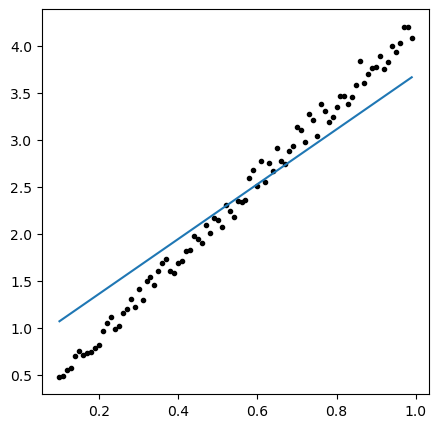

In [11]:
y = m * l + c
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(l, tsq, '.k')
ax.plot(l, y)

In [12]:
# # Training for 1000 iterations, plotting after every 100 iterations:

# # Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
# for num in range(20):
#     # We will plot the error values for every 100 iterations
#     m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=10, iterations=1000) 
#     print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
#     y = m * l + c

In [13]:
# fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(111)
# ax.plot(l, tsq, '.k')
# ax.plot(l, y)